# Bayesian Linear Regression

## Simple linear regression

We start with a single predictor $x$ and a continuous response $y$.

The **deterministic regression line** is

$$
\mu(x) = \mathbb{E}[Y \mid X = x] = \beta_0 + \beta_1 x,
$$

with intercept $\beta_0$ and slope $\beta_1$.

To make this into a **probabilistic model**, we add a noise term:

$$
Y_i = \beta_0 + \beta_1 x_i + \varepsilon_i, \qquad
\varepsilon_i \sim \mathcal{N}(0, \sigma^2), \quad i = 1,\dots,n.
$$

Equivalently, the **likelihood** for each observation is

$$
Y_i \mid \beta_0,\beta_1,\sigma,x_i
\sim \mathcal{N}(\beta_0 + \beta_1 x_i,\; \sigma^2).
$$

In vector–matrix form, with design matrix

$$
X =
\begin{pmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n
\end{pmatrix},
\quad
\boldsymbol{\beta} =
\begin{pmatrix}
\beta_0 \\ \beta_1
\end{pmatrix},
$$

the model is

$$
\mathbf{y} \mid \boldsymbol{\beta}, \sigma
\sim \mathcal{N}\big(X\boldsymbol{\beta}, \sigma^2 I_n\big).
$$

## Likelihood and ordinary least squares (OLS)

Under the normal likelihood

$$
p(\mathbf{y} \mid \boldsymbol{\beta},\sigma,X)
= \prod_{i=1}^{n}
  \frac{1}{\sqrt{2\pi}\,\sigma}
  \exp\!\left(
    -\frac{1}{2\sigma^2}
    \big(y_i - (\beta_0 + \beta_1 x_i)\big)^2
  \right),
$$

the **log-likelihood** (up to additive constants) is

$$
\log p(\mathbf{y} \mid \boldsymbol{\beta},\sigma,X)
= -\frac{1}{2\sigma^2}
  \sum_{i=1}^{n} \big(y_i - (\beta_0 + \beta_1 x_i)\big)^2
  + \text{const}.
$$

Maximizing this log-likelihood w.r.t. $\boldsymbol{\beta}$ (for fixed $\sigma$) is equivalent to **minimizing the sum
of squared residuals**:

$$
\hat{\boldsymbol{\beta}}_{\text{OLS}}
= \arg\min_{\boldsymbol{\beta}}
  \sum_{i=1}^{n} \big(y_i - (\beta_0 + \beta_1 x_i)\big)^2.
$$

In matrix form, the OLS solution has a closed form:

$$
\hat{\boldsymbol{\beta}}_{\text{OLS}}
= (X^\top X)^{-1} X^\top \mathbf{y},
$$

provided $X^\top X$ is invertible.

OLS is the **maximum likelihood estimator** for $\boldsymbol{\beta}$ under the normal linear model with constant
variance $\sigma^2$.

## Bayesian linear regression

In the Bayesian view, the parameters $(\beta_0,\beta_1,\sigma)$ are **random variables** with a prior distribution.

A common prior choice (conceptually) is:

- Regression coefficients:
  $$
  \boldsymbol{\beta} \sim \mathcal{N}(\boldsymbol{\mu}_0,\; \Sigma_0),
  $$
- Noise scale:
  $$
  \sigma \sim \text{some prior on } (0,\infty)
  \quad\text{(e.g. half-normal, exponential, or half-Cauchy).}
  $$

Given the data $(\mathbf{y}, X)$, the **posterior** over parameters is

$$
p(\boldsymbol{\beta},\sigma \mid \mathbf{y}, X)
= \frac{
    p(\mathbf{y} \mid \boldsymbol{\beta},\sigma,X)\,
    p(\boldsymbol{\beta},\sigma)
  }{
    p(\mathbf{y} \mid X)
  }.
$$

Using Bayes’ theorem explicitly,

$$
p(\boldsymbol{\beta},\sigma \mid \mathbf{y}, X)
\propto
p(\mathbf{y} \mid \boldsymbol{\beta},\sigma,X)\,
p(\boldsymbol{\beta},\sigma).
$$

For conjugate priors (normal–inverse-gamma), the posterior has an analytic form; in practice we often let PyMC/Bambi
do the MCMC sampling from $p(\boldsymbol{\beta},\sigma \mid \mathbf{y},X)$.

## Posterior predictive distribution for regression

For a new input $x_{\text{new}}$, the model implies

$$
Y_{\text{new}} \mid \beta_0,\beta_1,\sigma,x_{\text{new}}
\sim \mathcal{N}(\beta_0 + \beta_1 x_{\text{new}}, \sigma^2).
$$

The **posterior predictive distribution**, which averages over uncertainty in $(\beta_0,\beta_1,\sigma)$, is

$$
p(y_{\text{new}} \mid x_{\text{new}}, \mathbf{y}, X)
= \int
    p(y_{\text{new}} \mid x_{\text{new}}, \beta_0,\beta_1,\sigma)\,
    p(\beta_0,\beta_1,\sigma \mid \mathbf{y}, X)\,
  d\beta_0\, d\beta_1\, d\sigma.
$$

In practice, with posterior samples
$\{(\beta_0^{(s)},\beta_1^{(s)},\sigma^{(s)})\}_{s=1}^{S}$, we approximate this by simulation:

1. For each posterior draw $s$,
   $$
   y_{\text{new}}^{(s)}
   \sim \mathcal{N}\big(\beta_0^{(s)} + \beta_1^{(s)} x_{\text{new}}, (\sigma^{(s)})^2\big).
   $$

2. The sample $\{y_{\text{new}}^{(s)}\}_{s=1}^{S}$ approximates $p(y_{\text{new}} \mid x_{\text{new}}, \mathbf{y}, X)$.

The posterior predictive distribution combines:

- **Aleatoric uncertainty**: the inherent noise $\varepsilon$ in $y$,
- **Epistemic uncertainty**: uncertainty about $(\beta_0,\beta_1,\sigma)$ due to finite data.

## Epistemic vs aleatoric uncertainty in regression

In the linear model

$$
Y = \beta_0 + \beta_1 X + \varepsilon,
\quad \varepsilon \sim \mathcal{N}(0,\sigma^2),
$$

we distinguish:

- **Aleatoric uncertainty**: variability in $Y$ even if $(\beta_0,\beta_1,\sigma)$ were known exactly.
  In this model, for a fixed $x$, this is just $\operatorname{Var}(Y \mid X=x,\beta_0,\beta_1,\sigma) = \sigma^2$.

- **Epistemic uncertainty**: additional variability in predictions due to uncertainty in $(\beta_0,\beta_1,\sigma)$
  as captured by the posterior $p(\beta_0,\beta_1,\sigma \mid \mathbf{y},X)$.

For the posterior predictive variance at a given $x_{\text{new}}$, the **law of total variance** gives

$$
\operatorname{Var}(Y_{\text{new}} \mid x_{\text{new}},\mathbf{y},X)
= \mathbb{E}_{\theta \mid \mathbf{y},X}
    \big[ \operatorname{Var}(Y_{\text{new}} \mid x_{\text{new}},\theta) \big]
  +
  \operatorname{Var}_{\theta \mid \mathbf{y},X}
    \big[ \mathbb{E}(Y_{\text{new}} \mid x_{\text{new}},\theta) \big],
$$

where $\theta = (\beta_0,\beta_1,\sigma)$.

- The first term corresponds to **aleatoric variance** (expected $\sigma^2$).
- The second term corresponds to **epistemic variance** (spread of the regression line due to parameter uncertainty).

With many data points covering a range of $x$, the epistemic term often becomes small near the data but remains
large when extrapolating far away from observed $x$ values.

## Bayesian linear regression with Bambi

[Bambi](https://bambinos.github.io/bambi/) is a high-level interface for Bayesian regression models built on top
of PyMC. It uses an **R-style formula interface**.

For simple linear regression of body fat on BMI, one might specify

```python
import bambi as bmb

model = bmb.Model("BodyFat ~ BMI", data=df)
results = model.fit()
```

Conceptually, this is equivalent to specifying the normal linear model

$$
\text{BodyFat}_i
\mid \beta_0,\beta_1,\sigma,\text{BMI}_i
\sim \mathcal{N}(\beta_0 + \beta_1 \,\text{BMI}_i,\; \sigma^2),
$$

with **weakly informative priors** chosen automatically for $\beta_0$, $\beta_1$, and $\sigma$.

Bambi:

- Builds the corresponding PyMC model and runs MCMC,
- Returns posterior samples in an `InferenceData` object,
- Provides tools for posterior summaries, HDIs, and predictive intervals.

More complex models (multiple predictors, categorical variables, interactions, non-normal likelihoods) can be
specified by extending the formula or choosing a different **family** (likelihood).

## Posterior HDIs for regression coefficients

From the posterior samples of regression coefficients, we can compute **highest density intervals (HDIs)**.

For a coefficient $\beta_j$ and a desired probability mass $p$ (e.g. $0.90$ or $0.94$), the $p$-HDI is an interval
$[a,b]$ such that

- $P(\beta_j \in [a,b] \mid \mathbf{y},X) = p$,
- posterior density inside the interval is **higher** than outside.

Practical interpretation:

- If a $94\%$ HDI for $\beta_1$ **does not include zero**, we say that zero is **not a plausible value** for $\beta_1$
  under the model and prior. In informal language: the effect is “significant at the 94% level”.
- If the HDI **does include zero**, then values on both sides (positive and negative effect) are compatible with data
  and prior; we cannot confidently say the effect is non-zero.

Bambi and ArviZ compute HDIs directly from the posterior samples.

## Bayesian $R^2$ for regression

In classical linear regression, the coefficient of determination $R^2$ measures the fraction of variance explained
by the model.

In a Bayesian setting, we can define a **Bayesian $R^2$** (Gelman et al.), based on posterior samples.

For each posterior draw $s = 1,\dots,S$:

1. Compute the vector of predicted means (fitted values)
   $$
   \boldsymbol{\mu}^{(s)}
   = \big(\mu_1^{(s)}, \dots, \mu_n^{(s)}\big)^\top,
   \quad
   \mu_i^{(s)} = \mathbb{E}[Y_i \mid x_i,\theta^{(s)}].
   $$

2. Compute residuals
   $$
   \mathbf{e}^{(s)} = \mathbf{y} - \boldsymbol{\mu}^{(s)}.
   $$

3. Compute the **explained variance** and **residual variance** for draw $s$:
   $$
   V_{\text{fit}}^{(s)} = \operatorname{Var}_i\big(\mu_i^{(s)}\big),
   \qquad
   V_{\text{res}}^{(s)} = \operatorname{Var}_i\big(e_i^{(s)}\big),
   $$
   where the variance is over data points $i = 1,\dots,n$.

Define the **per-draw $R^2$** as

$$
R^{2,(s)}
= \frac{V_{\text{fit}}^{(s)}}{V_{\text{fit}}^{(s)} + V_{\text{res}}^{(s)}}.
$$

The Bayesian $R^2$ is then summarized by the posterior distribution of $\{R^{2,(s)}\}_{s=1}^{S}$, e.g. by its mean
and an HDI.

This approach acknowledges:

- Uncertainty in the regression function (epistemic),
- Uncertainty in the noise (aleatoric).

## Multiple linear regression

With $p$ predictors, the linear regression model generalizes to

$$
Y_i
= \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_p x_{ip} + \varepsilon_i,
\quad \varepsilon_i \sim \mathcal{N}(0,\sigma^2).
$$

In matrix notation:

$$
\mathbf{y} \mid \boldsymbol{\beta},\sigma,X
\sim \mathcal{N}(X \boldsymbol{\beta}, \sigma^2 I_n),
$$

where now $X$ is an $n \times (p+1)$ matrix (including the intercept column of ones).

Bayesian multiple linear regression:

- Place a prior on the coefficient vector $\boldsymbol{\beta}$ and $\sigma$,
- Use MCMC (via PyMC/Bambi) to obtain posterior samples $p(\boldsymbol{\beta},\sigma \mid \mathbf{y},X)$,
- Summarize and interpret parameter and predictive uncertainty.

Adding predictors generally:

- Increases the **potential explained variance**,
- Increases **epistemic uncertainty** (more parameters to estimate),
- Risks **overfitting** if not regularized or if model is too flexible for the data size.

## Categorical predictors and interactions

Categorical predictors (e.g. **Student** yes/no, or **Ethnicity** with several categories) are incorporated via
**dummy variables**.

Example: binary predictor *Student* (0 = no, 1 = yes):

$$
\mathbb{E}[Y \mid \text{Limit},\text{Student}]
= \beta_0 + \beta_1 \,\text{Limit} + \beta_2 \,\text{Student}.
$$

- $\beta_2$ shifts the mean response up or down for students compared to non-students.

**Interactions** between predictors allow the effect of one predictor to depend on another.

For two continuous predictors $x_1$ (TV budget) and $x_2$ (radio budget), a model with interaction is

$$
\mathbb{E}[Y \mid x_1,x_2]
= \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 (x_1 x_2).
$$

- $\beta_3$ captures **synergy** (if positive) or **redundancy** (if negative) between channels.

In Bambi’s formula syntax:

- Main effects: `Sales ~ TV + radio`
- With interaction: `Sales ~ TV * radio`

where `TV * radio` expands to `TV + radio + TV:radio`.

## Robust linear regression with Student's $t$ likelihood

The normal likelihood is **sensitive to outliers**: large residuals are heavily penalized, which can pull the
regression line towards outlying points.

To reduce sensitivity to outliers, we can model residuals with a **Student's $t$ distribution**:

$$
Y_i \mid \mu_i,\sigma,\nu
\sim t_{\nu}(\mu_i, \sigma),
\qquad
\mu_i = \beta_0 + \beta_1 x_i + \dots,
$$

where

- $\nu > 0$ is the **degrees of freedom** parameter (shape),
- smaller $\nu$ yields **heavier tails** than the normal distribution.

As $\nu \to \infty$, the Student's $t$ distribution converges to the normal:

$$
t_{\nu}(\mu,\sigma)
\;\xrightarrow[\nu \to \infty]{}\;
\mathcal{N}(\mu,\sigma^2).
$$

A Bayesian robust regression model might use:

- Normal priors for coefficients $\boldsymbol{\beta}$,
- A prior on $\sigma > 0$ (half-normal, exponential, etc.),
- A prior on $\nu$ (e.g. $\nu \sim \operatorname{Gamma}(s,r)$).

Compared to the normal-likelihood model, the $t$-likelihood:

- Gives less weight to extreme residuals,
- Produces regression lines less distorted by outliers,
- Often yields broader predictive intervals, reflecting uncertainty about outliers.

## Polynomial regression

To capture simple nonlinear relationships between a single predictor $x$ and response $y$, we can use **polynomial
regression**.

For a degree-3 polynomial:

$$
\mathbb{E}[Y \mid X = x]
= \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3.
$$

This is still **linear in the parameters** $\boldsymbol{\beta}$, so it fits into the linear regression framework by
defining transformed predictors:

$$
z_{i1} = x_i,\quad
z_{i2} = x_i^2,\quad
z_{i3} = x_i^3.
$$

However:

- Polynomial terms can be **strongly correlated** (e.g. $x$ and $x^2$), causing numerical issues.
- High-degree polynomials can **overfit** heavily, especially with few data points.

Bambi’s `poly(x, d)` construct can create **orthogonal polynomials**, which reduce the correlations between polynomial
terms and improve sampling stability.

## Overfitting and epistemic uncertainty in polynomial models

With few data points and a highly flexible model (e.g. high-degree polynomial), the model can fit the training data
very closely, but:

- The regression function becomes **wiggly** and unstable,
- Posterior predictive intervals can become very **wide** away from data points,
- Epistemic uncertainty increases, reflecting that many different polynomials are compatible with the data.

Bayesian inference:

- Makes overfitting **visible** in the posterior distribution of functions and predictive intervals,
- Encourages the use of **priors** (shrinkage) to regularize complex models,
- Allows the use of **model comparison** (e.g. Bayes factors, ELPD) to decide whether increased flexibility is justified.

## Shrinkage via normal priors and L2 regularisation

Consider a linear regression model with predictors $X$ (possibly including polynomial terms) and coefficients
$\boldsymbol{\beta}$. Suppose we place an independent **normal prior** on each coefficient:

$$
\beta_j \sim \mathcal{N}(0,\tau^2),
\quad j = 1,\dots,p,
$$

and a normal likelihood

$$
\mathbf{y} \mid \boldsymbol{\beta},\sigma,X
\sim \mathcal{N}(X\boldsymbol{\beta},\sigma^2 I_n).
$$

Ignoring constants, the **log posterior** is

$$
\log p(\boldsymbol{\beta} \mid \mathbf{y},X,\sigma)
= \log p(\mathbf{y} \mid \boldsymbol{\beta},\sigma,X)
  + \log p(\boldsymbol{\beta})
  + \text{const}.
$$

Up to additive constants, this becomes

$$
\log p(\boldsymbol{\beta} \mid \mathbf{y},X,\sigma)
= -\frac{1}{2\sigma^2} \|\mathbf{y} - X\boldsymbol{\beta}\|_2^2
  -\frac{1}{2\tau^2} \|\boldsymbol{\beta}\|_2^2
  + \text{const}.
$$

The **maximum a posteriori (MAP)** estimate $\hat{\boldsymbol{\beta}}_{\text{MAP}}$ maximizes this log posterior, i.e.
minimizes

$$
\frac{1}{2\sigma^2} \|\mathbf{y} - X\boldsymbol{\beta}\|_2^2
+ \frac{1}{2\tau^2} \|\boldsymbol{\beta}\|_2^2.
$$

Up to a constant factor, this is equivalent to **ridge regression** (L2 regularisation):

$$
\hat{\boldsymbol{\beta}}_{\text{ridge}}
= \arg\min_{\boldsymbol{\beta}}
  \Big\{
    \|\mathbf{y} - X\boldsymbol{\beta}\|_2^2
    + \lambda \|\boldsymbol{\beta}\|_2^2
  \Big\},
$$

with penalty parameter $\lambda = \sigma^2 / \tau^2$.

Thus:

- L2 regularisation corresponds to a **normal prior** on coefficients centered at zero.
- Stronger prior shrinkage (smaller $\tau$) corresponds to larger $\lambda$ and stronger penalization of large
  coefficients.

## L1 regularisation and Laplace prior

Analogously, **L1 regularisation** (lasso) corresponds to a **Laplace** (double-exponential) prior on the coefficients.

The Laplace prior for a scalar coefficient $\beta$ with scale $b > 0$ has density

$$
p(\beta)
= \frac{1}{2b} \exp\!\left(-\frac{|\beta|}{b}\right).
$$

Ignoring constants, the log prior is

$$
\log p(\beta) = -\frac{|\beta|}{b} + \text{const},
$$

so for a vector of coefficients $\boldsymbol{\beta}$ with independent Laplace priors, the negative log prior adds
a term proportional to $\|\boldsymbol{\beta}\|_1$.

The MAP estimator then minimizes

$$
\|\mathbf{y} - X\boldsymbol{\beta}\|_2^2
+ \lambda \|\boldsymbol{\beta}\|_1,
$$

which is the **lasso** objective.

In summary:

- **Normal prior** on $\boldsymbol{\beta}$ $\Rightarrow$ **ridge (L2)** penalty at MAP.
- **Laplace prior** on $\boldsymbol{\beta}$ $\Rightarrow$ **lasso (L1)** penalty at MAP.

Regularisation can therefore be understood as a natural consequence of using informative priors in Bayesian models.

## Model selection versus regularisation

When dealing with flexible models (e.g. polynomials of various degrees), there are two complementary strategies:

1. **Model selection**  
   Compare several models (e.g. linear, quadratic, cubic) using:
   - **Bayes factors** (marginal likelihoods),
   - **ELPD / LOO**,
   - **Posterior predictive checks**,
   - **Predictive RMSE/MAE**.

   Then choose the model that best balances fit and complexity.

2. **Regularisation (shrinkage)**  
   Use a richer model (e.g. higher-degree polynomial) but place **strong priors** that shrink higher-order
   coefficients towards zero. This keeps the model flexible but penalizes unnecessary complexity.

Often, a combination of both is used:

- Start with a simple model,
- Add complexity if strongly supported by posterior predictive checks and model comparison,
- Use priors to regularize complex models and avoid overfitting.

In Bayesian regression, regularisation is not an ad-hoc fix but an integral part of the modelling philosophy through
the choice of **priors**.

# Exercises

Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import preliz as pz
import pymc as pm
import arviz as az
import bambi as bmb
plt.rcParams["figure.figsize"] = (8,3)
plt.style.use('ggplot')
np.random.seed(1337) # for consistency

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## Exercise 1

In this exercise you will perform the basic steps of **Bayesian linear regression** using the
credit card dataset from `credit_data.csv`. The goal is to predict the **credit card balance**
(current credit card debt in USD) using the credit **limit** (in USD) as a single predictor.

In [2]:
credit_data = pd.read_csv("data/credit_data.csv")
credit_data.head()

,ID,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


### a)

You want to predict the credit card balance `Balance` of a person using only their credit
limit `Limit` as a predictor.

Write down the **full Bayesian linear regression model** in mathematical notation, including

- prior(s) for the regression coefficients and noise scale,
- the normal likelihood.

Do **not** specify numeric values for the prior parameters, but write the structure, for example

- prior for intercept and slope (e.g. normal),
- prior for $\sigma$ (e.g. half-normal, exponential),
- likelihood of the form
  $$
  Y_i \mid \beta_0,\beta_1,\sigma,x_i
  \sim \mathcal{N}(\beta_0 + \beta_1 x_i,\; \sigma^2),
  $$
  where $Y_i$ is `Balance` and $x_i$ is `Limit`.

\begin{eqnarray}
\beta_0 &\sim& N(\theta_0, \tau_0^2)\\
\beta_1 &\sim& N(\theta_1, \tau_1^2)\\
\sigma &\sim& \text{Exp}(1/l) \quad (\text{or something similar, as long as its only over positive values})\\
y|\beta_0, \beta_1, \sigma &\sim& N(\beta_0 + \beta_1 \, x, \sigma^2)
\end{eqnarray}

### b)

Fit a simple linear regression model with Bambi that predicts `Balance` from `Limit` using
a normal likelihood and **default priors**, for example

```python
credit_model1 = bmb.Model("Balance ~ Limit", data=credit_data, family="gaussian")
credit_trace1 = credit_model1.fit()
```

Tasks:

1. Inspect the underlying PyMC model with
   ```python
   credit_model1.backend.model
   ```
2. Plot the graphical model with
   ```python
   credit_model1.graph()
   ```

Compare this automatically constructed model with the model you wrote down in part (a):

- Are the likelihood and structure the same?
- How do the prior families and scales chosen by Bambi compare to your own choices?

In [3]:
credit_model1 = bmb.Model("Balance ~ Limit", data=credit_data, family="gaussian")
credit_trace1 = credit_model1.fit(draws=2000, tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Balance_sigma, Intercept, Limit]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 2 seconds.


In [4]:
credit_model1.backend.model

Balance_sigma ~ HalfStudentT(4, 459)
    Intercept ~ Normal(520, 2.62e+03)
        Limit ~ Normal(0, 0.498)
      Balance ~ Normal(f(Intercept, Limit), Balance_sigma)

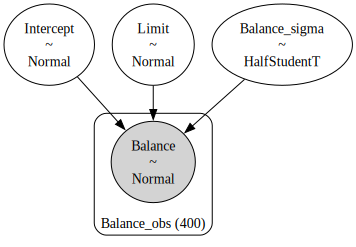

In [5]:
credit_model1.graph() # may lead to warnings or errors depending on what versions you use / what packages you have installed

Bambi uses a half Student's $t$ distribution and I proposed an exponential distribution above. Both only go over positive values and since they are weak there should not be a big difference in the resulting posterior.

### c)

Use PyMC / ArviZ to summarize the **posterior distribution of the regression coefficients**
and to visualize them.

1. Call
   ```python
   pm.summary(credit_trace1, hdi_prob=0.95)
   ```
   to obtain numerical summaries, including mean, standard deviation and $95\%$ HDIs.
2. Call
   ```python
   pm.plot_posterior(credit_trace1, hdi_prob=0.95)
   ```
   to visualize the marginal posteriors.

Then:

- Write down the **mean regression model**
  $$
  \mathbb{E}[\text{Balance} \mid \text{Limit} = x]
  = \hat{\beta}_0 + \hat{\beta}_1 x,
  $$
  using the posterior means $\hat{\beta}_0$ and $\hat{\beta}_1$.
- Interpret the coefficients in words:
  - How does the expected balance change when the limit increases by \$1000?
  - What is the meaning of the intercept in this context?

In [6]:
pm.summary( credit_trace1, hdi_prob=0.95 )

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-292.684,26.415,-346.391,-242.462,0.232,0.164,12963.0,6091.0,1.0
Limit,0.172,0.005,0.162,0.182,0.000,0.000,13074.0,6243.0,1.0
Balance_sigma,234.259,8.183,218.207,250.381,0.076,0.054,11704.0,5667.0,1.0


array([<Axes: title={'center': 'Intercept'}>,
       <Axes: title={'center': 'Limit'}>,
       <Axes: title={'center': 'Balance_sigma'}>], dtype=object)

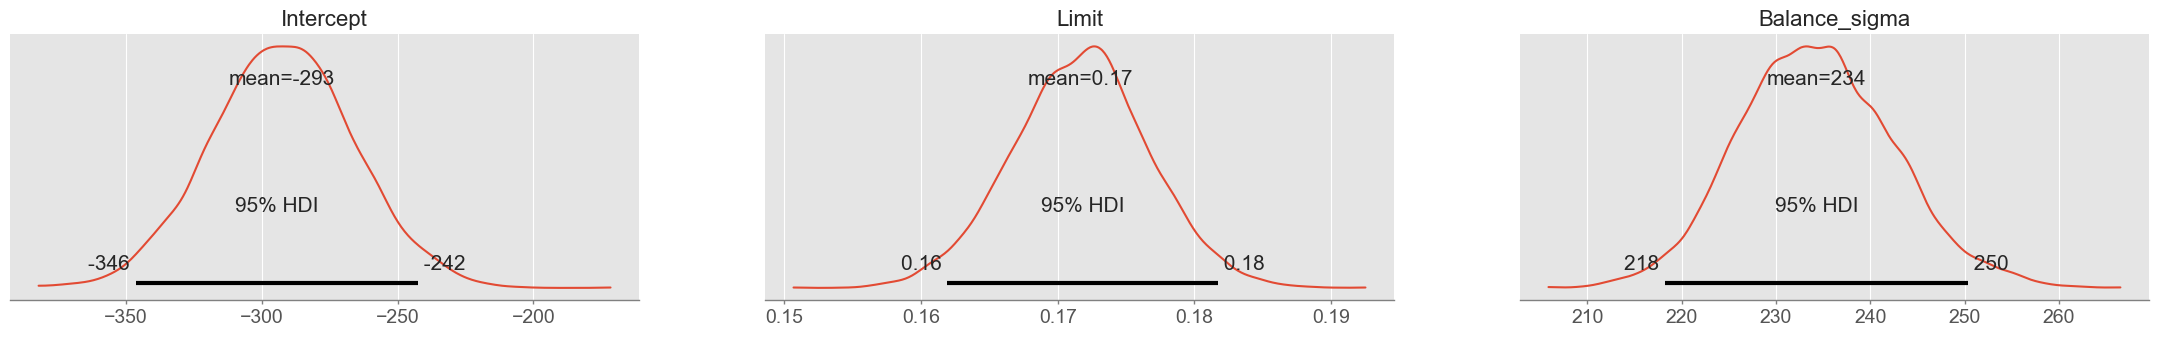

In [7]:
pm.plot_posterior( credit_trace1, hdi_prob=0.95 )

Mean model: 

$$\text{Balance} = -293 + 0.17 \cdot \text{Limit}$$

Interpretation: For every USD by that the limit is increased, the customer has 17 cents more debts. However the model does probably not hold for small balances and limits: for a limit of 0, the balance would be -293 USD (intercept). This is probably due to non-linearity.

### d)

Create a plot with the data and the regression line using

```python
bmb.interpret.plot_predictions(
    credit_model1,
    credit_trace1,
    hdi_prob=0.95,
    kind="mean",
)
```

or an equivalent call. Choose the options such that you obtain a **$95\%$ HDI** for the
regression line (posterior mean function).

Tasks:

- Visually inspect the figure and explain **why the estimated intercept is negative**.
  (Hint: think about the range of observed `Limit` values.)
- Use the plot to judge:
  - **Aleatoric uncertainty** (vertical spread of data around the regression line),
  - **Epistemic uncertainty** (width of the HDI band for the regression line).
  
Remember that the `pps` parameter controls whether the band refers to the **posterior
regression line distribution** or the **predictive distribution**.

(<Figure size 800x300 with 1 Axes>,
 array([<Axes: xlabel='Limit', ylabel='Balance'>], dtype=object))

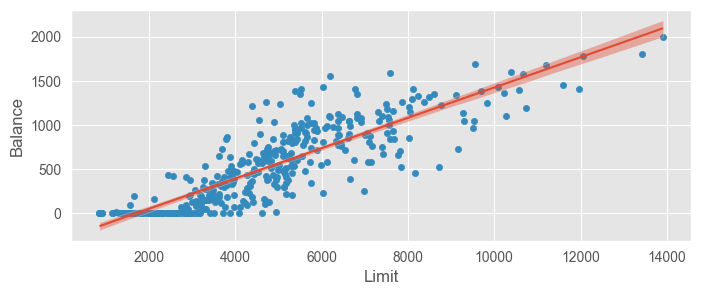

In [8]:
credit_data.plot.scatter( x="Limit", y="Balance" )
bmb.interpret.plot_predictions( credit_model1, credit_trace1, "Limit", prob=0.95, ax=plt.gca() )

The non-linearity in the beginning is clearly visible, leading to a compensation of the model with a negative intercept.

The epistemic uncertainty is quite small in comparison with the aleatoric certainty (unexplained variance in the data after fitting the model).

### e)

Assess how good your model is by computing **Bayesian predictive** versions of:

- Root mean squared error (RMSE),
- Mean absolute error (MAE),
- $R^2$ score.

Use posterior predictive simulations (for example via `.predict()` or
`pm.sample_posterior_predictive()`) to obtain predictions $y_i^{(s)}$ and compute

- $\operatorname{RMSE}_{\text{Bayes}}$,
- $\operatorname{MAE}_{\text{Bayes}}$,
- the **Bayesian $R^2$** as defined in the lecture (per-draw variance decomposition).

Make sure you understand the **Bayesian interpretation of $R^2$**:

- There is a posterior distribution over $R^2$,
- It reflects uncertainty about how much of the variance in `Balance` is explained by the
  regression on `Limit`.

In [9]:
credit_model1.predict(credit_trace1, kind="pps")
ypred = az.extract( credit_trace1.posterior_predictive ).Balance.values.T
ytrue = credit_data.Balance.values

RMSE:

In [10]:
np.sqrt( np.mean( (ypred - ytrue)**2 ) )

330.7560121042833

Given the credit card limit, we are able to model the balance by $\pm$ 331 USD.

MAE:

In [11]:
np.mean( np.abs( ypred - ytrue ) )

260.54046373269773

MAE is quite a bit smaller, indicating the presence of points further away from the line than expected.

$R^2$:

In [12]:
pm.r2_score( ytrue, ypred )

r2        0.659472
r2_std    0.018593
dtype: float64

The model is doing reasonably well for just one predictor.

### f)

You now want to predict the credit card balance for a new customer with limit

$$
\text{Limit} = 3000~\text{USD}.
$$

Tasks:

1. Compute the **posterior predictive distribution** for `Balance` at this limit and
   summarize it with a **$90\%$ HDI**.
2. Visualize this predictive distribution (e.g. with a histogram or kernel density plot).

Then:

- Check whether the recovered predictive distribution seems **reasonable** given your
  knowledge of the data and the regression fit.
- Decompose the **predictive variance** into:

  - **Epistemic variance** $\sigma_e^2$: the variance of the predicted means
    $$
    \mu^{(s)} = \beta_0^{(s)} + \beta_1^{(s)} \cdot 3000,
    $$
  - **Predictive variance** $\sigma_p^2$: the variance of the predictive samples
    $y_{\text{new}}^{(s)}$ for `Balance` at limit \$3000,
  - **Aleatoric variance** $\sigma_a^2$, using
    $$
    \sigma_p^2 = \sigma_e^2 + \sigma_a^2.
    $$

Explain in words what fraction of the predictive uncertainty at \$3000 limit is due to
epistemic vs aleatoric uncertainty.

Compute predictive distribution:

In [13]:
pred = credit_model1.predict( credit_trace1, kind="pps", data=pd.DataFrame({'Limit': [3000]}), inplace=False )
pm.summary( pred.posterior_predictive, hdi_prob=0.9 )

,mean,sd,hdi_5%,hdi_95%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Balance[0],221.226,236.214,-171.604,606.185,2.66,1.881,7880.0,7971.0,1.0


<Axes: title={'center': 'Balance\n0'}>

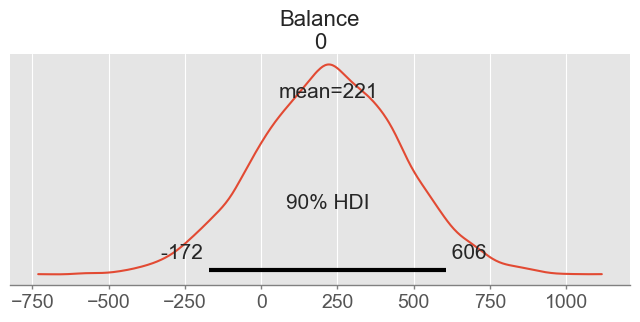

In [14]:
pm.plot_posterior( pred.posterior_predictive, hdi_prob=0.9 )

With a probability of 90%, the balance will be between -153 and 618 USD. This is clearly an artefact of a 'wrong' likelihood model (normal), since balance (debts) cannot be negative.

In [15]:
var_e = pred.posterior.mu.var().values
var_p = pred.posterior_predictive.Balance.var().values
var_a = var_p - var_e
np.sqrt( var_a ), np.sqrt( var_e ), np.sqrt( var_p )

AttributeError: 'Dataset' object has no attribute 'mu'

Ratios:

In [16]:
var_e/var_p, var_a/var_p

(np.float64(0.004097133761204795), np.float64(0.9959028662387952))

Most of the uncertainty is of aleatoric nature! Collecting more data will not make the model better.

## Exercise 2

In Exercise 1, your linear model with normal likelihood sometimes predicts **negative balances**,
which are not realistic. You now explore an alternative likelihood that **truncates** the normal
distribution so that predictions are restricted to a feasible range.

### a)

Instead of the standard normal likelihood

$$
y \mid \beta_0,\beta_1,\sigma,x
\sim \mathcal{N}(\beta_0 + \beta_1 x,\; \sigma^2),
$$

you propose to use a **truncated normal** likelihood that only allows balances between
$0$ and $2000$ (since the maximum observed balance is around this value):

$$
y \mid \beta_0,\beta_1,\sigma,x
\sim \operatorname{TruncNormal}\big(
  \mu = \beta_0 + \beta_1 x,\;
  \sigma^2,\;
  \text{lower} = 0,\;
  \text{upper} = 2000
\big).
$$

Because `TruncatedNormal` is **not available in Bambi**, you have to implement this model
directly in **PyMC** (slight modification of the code used in the lecture for a normal
linear regression).

Implement the model in PyMC and run a posterior simulation.

In [16]:
x = credit_data.Limit
y_obs = credit_data.Balance

with pm.Model() as credit_model2:
    # priors
    beta0 = pm.Normal('beta0', mu=credit_data.Balance.mean(), sigma=10 )
    beta1 = pm.Normal('beta1', mu=0, sigma=10 )
    sigma = pm.Exponential('sigma', lam=1/10 )

    # likelihood
    y = pm.TruncatedNormal('y', mu=beta0+beta1*x, lower=0, upper=2000, sigma=sigma, observed=y_obs )

    # simulate posterior
    credit_trace2 = pm.sample( 2000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta0, beta1, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 2 seconds.


### b)

Using the posterior samples from your truncated normal model:

1. Compute the **posterior mean** of $\beta_0$ and $\beta_1$.
2. Plot a scatterplot of the observed data and overlay the corresponding **mean regression
   line**.

Interpret your results:

- How do the estimates of $\beta_0$ and $\beta_1$ compare to those from the normal
  likelihood model in Exercise 1?
- Does this truncated normal model behave sensibly near the lower boundary at 0?
- Given your comparison, would you prefer this truncated model over the simpler model
  from Exercise 1? Justify your answer.

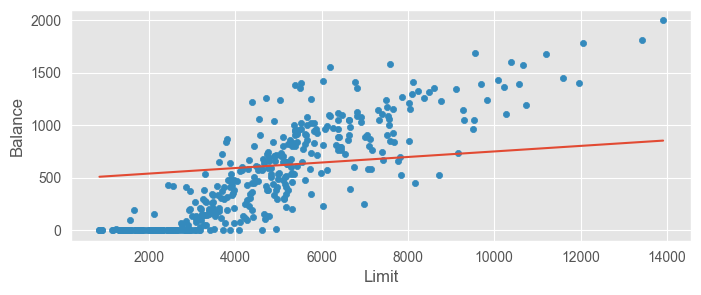

In [17]:
mean_beta0 = credit_trace2.posterior.beta0.mean().values
mean_beta1 = credit_trace2.posterior.beta1.mean().values
xrange = np.linspace( credit_data.Limit.min(), credit_data.Limit.max(), 1000 )

credit_data.plot.scatter( x="Limit", y="Balance" )
plt.plot( xrange, mean_beta0 + mean_beta1 * xrange )

Even though the model does not produce negative values anymore, it's bias is now too strong! The visible trend cannot be fitted. This model should definitely not be used.

## Exercise 3

You now switch to an **insurance dataset** in `insurance.csv`. The goal is to predict yearly
medical insurance **charges** (in USD) based on several predictors. You will use **multiple
Bayesian linear regression** to estimate the regression coefficients and quantify predictive
performance.

### a)

Load the dataset with Pandas and inspect the available variables.

For a first analysis, use the predictors

- `age`,
- `bmi`,
- `smoker`

to predict insurance `charges`.

Tasks:

1. Perform an **exploratory data analysis**:
   - Plot `age` vs `charges`,
   - Plot `bmi` vs `charges`,
   - In each plot, color the points by `smoker` status (e.g. using the `hue` parameter
     in seaborn).
2. From the plots, discuss briefly how age, BMI and smoking might relate to insurance
   charges and whether you expect linear relations.

In [18]:
insurance_data = pd.read_csv("data/insurance.csv")
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='age', ylabel='charges'>

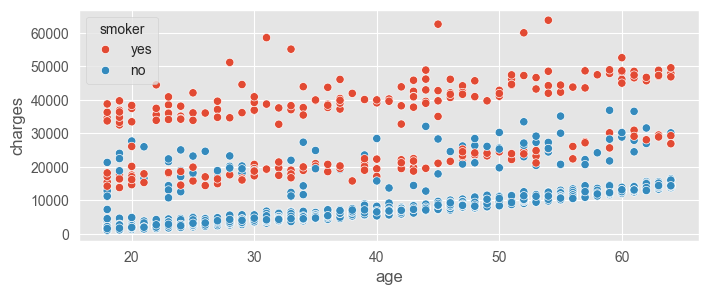

In [19]:
sns.scatterplot( data=insurance_data, x="age", y="charges", hue="smoker" )

<Axes: xlabel='bmi', ylabel='charges'>

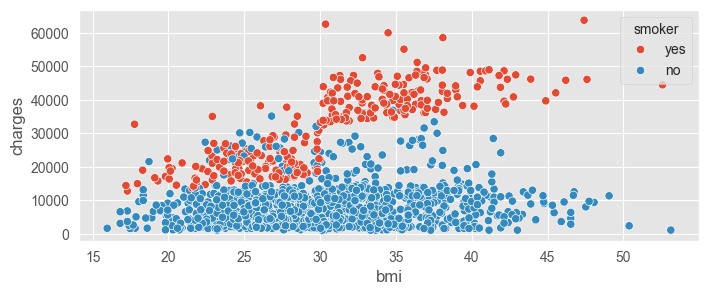

In [20]:
sns.scatterplot( data=insurance_data, x="bmi", y="charges", hue="smoker" )

Smoker is clearly a very important variable!

### b)

Fit a multiple Bayesian linear regression model with Bambi that predicts `charges` from
`age`, `bmi` and `smoker`, e.g.

```python
ins_model1 = bmb.Model("charges ~ age + bmi + smoker", data=insurance_data)
ins_trace1 = ins_model1.fit()
```

Tasks:

1. Summarize the posterior for all model parameters with $95\%$ HDIs (e.g. using
   `pm.summary()`).
2. Interpret the role of each parameter in the prediction:
   - How does `age` affect the expected charges?
   - How does `bmi` affect the expected charges?
   - How does being a smoker (vs non-smoker) change the expected charges?
3. Decide whether the parameters are **“significant in the Bayesian sense”** by checking
   whether their HDIs exclude zero.
4. Compute **Bayesian RMSE** and **Bayesian $R^2$** to quantify the predictive performance
   of this model.

In [21]:
insurance_model1 = bmb.Model("charges ~ age + bmi + smoker", data=insurance_data, family="gaussian")
insurance_trace1 = insurance_model1.fit(draws=2000, tune=2000)
pm.summary( insurance_trace1, hdi_prob=0.95 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [charges_sigma, Intercept, age, bmi, smoker]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,-11682.105,947.270,-13530.712,-9863.149,8.054,5.695,13851.0,6260.0,1.0
age,259.591,12.099,236.211,282.986,0.107,0.076,12867.0,6699.0,1.0
bmi,322.729,27.640,269.092,376.397,0.246,0.174,12675.0,7012.0,1.0
smoker[yes],23820.540,414.302,23027.892,24613.548,3.460,2.446,14278.0,6703.0,1.0
charges_sigma,6098.217,118.101,5870.198,6330.892,1.140,0.806,10762.0,6818.0,1.0


All parameters are significant at the 95% level (no HDI includes zero). The model can be interpreted as follows: Each year of age results in a mean of 260 USD of additional charges, a BMI increase of 1 results in a mean of additional 322 USD of charges and smokers have on average 23'800 USD more insurance charges than non-smokers!

In [23]:
insurance_model1.predict(insurance_trace1, kind="pps")
ypred = az.extract( insurance_trace1.posterior_predictive ).charges.values.T
ytrue = insurance_data.charges.values

RMSE:

In [24]:
np.sqrt( np.mean( (ypred - ytrue)**2 ) )

8620.864033065895

Our predictions will typically be away from the ground truth by $\pm$ 8600 USD!

$R^2$:

In [25]:
pm.r2_score( ytrue, ypred )

r2        0.664033
r2_std    0.010334
dtype: float64

There is still a lot of variance to be explained!

### c)

Fit a second, more complex model that includes **all available predictors** in
`insurance.csv` as predictors for `charges`.

Tasks:

1. Summarize the posterior for all parameters, and decide which predictors **significantly
   contribute** to the prediction (HDIs excluding zero).
2. Compute Bayesian RMSE and Bayesian $R^2$ for this more complex model.
3. Compare the two models (simple vs complex):
   - Which model has better predictive performance?
   - Which model would you prefer in practice, and why (parsimony vs predictive gain)?

In [26]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [28]:
insurance_model2 = bmb.Model("charges ~ age + sex + bmi + children + smoker + region", data=insurance_data, family="gaussian")
insurance_trace2 = insurance_model2.fit(draws=2000, tune=2000)
pm.summary( insurance_trace2, hdi_prob=0.95 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [charges_sigma, Intercept, age, sex, bmi, children, smoker, region]


ValueError: Not enough samples to build a trace.

Sex and region[northwest] do not contribute significantly at the 95% level (HDIs include zero).

Performance metrics:

In [28]:
insurance_model2.predict(insurance_trace2, kind="pps")
ypred = az.extract( insurance_trace2.posterior_predictive ).charges.values.T
ytrue = insurance_data.charges.values

RMSE:

In [29]:
np.sqrt( np.mean( (ypred - ytrue)**2 ) )

np.float64(8578.626184138278)

$R^2$:

In [30]:
pm.r2_score( ytrue, ypred )

r2        0.666538
r2_std    0.010132
dtype: float64

The improvement in terms of metrics is marginal. Rather use the more simple model from b) for this data! 

### d)

Consider your more complex model from part (c) with all predictors.

Could this model become **appreciably better** with more data? To get a feeling for this,
compute the decomposition of predictive variance into **epistemic** and **aleatoric**
components on the full dataset.

Tasks:

1. Use `.predict()` on your model, passing the full data
   ```python
   predictions = ins_model2.predict(insurance_data)
   ```
2. From the predictions, compute:
   - Epistemic variance $\sigma_e^2$ (variance of predicted means),
   - Aleatoric variance $\sigma_a^2$ (residual variance),
   - Total predictive variance $\sigma_p^2 = \sigma_e^2 + \sigma_a^2$.

Interpret whether there is still substantial **epistemic uncertainty** that could be reduced
by collecting more data.

Compute model predictions:

In [31]:
pred = insurance_model2.predict( insurance_trace2, kind="pps", data=insurance_data, inplace=False )

Compute different uncertainties (see lecture):

In [32]:
var_e = pred.posterior.mu.var().values
np.sqrt( var_e )

np.float64(10499.037071488348)

In [33]:
var_p = pred.posterior_predictive.charges.var().values
np.sqrt( var_p )

np.float64(12125.139005403647)

In [34]:
var_a = var_p - var_e
np.sqrt( var_a )

np.float64(6065.411484134803)

In [35]:
var_e / var_p, var_a / var_p

(np.float64(0.749765557528311), np.float64(0.25023444247168897))

There is a significant part of epistemic uncertainty! With more data we might thus also be able to use a model with more predictors (emphasis on might).

### e)

It is often claimed that being both **overweight** and a **smoker** has a particularly strong,
more-than-additive effect on health outcomes and thus on insurance charges.

To investigate this, extend your model by adding an **interaction term** between `bmi`
and `smoker`, e.g.

```python
ins_model3 = bmb.Model("charges ~ age + bmi * smoker + ...", data=insurance_data)
```

Tasks:

1. Fit the model with the interaction term.
2. Use `pm.summary()` to examine the posterior of the interaction coefficient.
3. Interpret the interaction:
   - Is the coefficient **significantly different from zero** (HDI excludes zero)?
   - Does the interaction suggest **synergy** (effect larger than the sum of individual
     effects) or **redundancy**?
4. Compare the predictive performance (Bayesian $R^2$) of this model to the model without
   interaction.

In [36]:
insurance_model3 = bmb.Model("charges ~ age + bmi + smoker + bmi:smoker", data=insurance_data, family="gaussian")
insurance_trace3 = insurance_model3.fit(draws=2000, tune=2000)
pm.summary( insurance_trace3, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, age, bmi, smoker, bmi:smoker]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 9 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,4911.809,95.349,4732.560,5103.148,1.044,1.188,8341.0,5423.0,1.0
Intercept,-2313.432,843.889,-4053.072,-708.409,10.486,10.016,6474.0,5542.0,1.0
age,266.625,9.696,248.509,286.376,0.117,0.116,6897.0,5490.0,1.0
bmi,8.019,25.295,-40.110,59.025,0.349,0.285,5236.0,5470.0,1.0
smoker[yes],-20049.028,1663.959,-23314.664,-16796.946,29.466,20.226,3192.0,4006.0,1.0
bmi:smoker[yes],1429.390,53.259,1326.506,1536.472,0.937,0.634,3232.0,3983.0,1.0


The interaction term is significant (and large), let's keep it if the predicitive performance increases as well:

In [37]:
insurance_model3.predict(insurance_trace3, kind="response")
ypred = az.extract( insurance_trace3.posterior_predictive ).charges.values.T
ytrue = insurance_data.charges.values
pm.r2_score( ytrue, ypred )

r2        0.752790
r2_std    0.008084
dtype: float64

A very significant improvement by almost 9% in explained variance! This is a clear indicator that this interaction term cannot be neglected when doing predictions.

### f)

Return to your exploratory plots from part (a), where `age`/`bmi` are plotted against
`charges` with points colored by `smoker` status.

Look carefully for patterns that might be consistent with a **significant interaction**
between overweight (`bmi`) and smoking:

- Do smokers with high BMI stand out in terms of charges compared to what you would
  expect from simply adding the effects of BMI and smoking?
- Is there visual evidence that the slope of the relationship between BMI and charges
  differs between smokers and non-smokers?

Summarize whether the visual evidence matches your model-based findings from part (e).

<Axes: xlabel='bmi', ylabel='charges'>

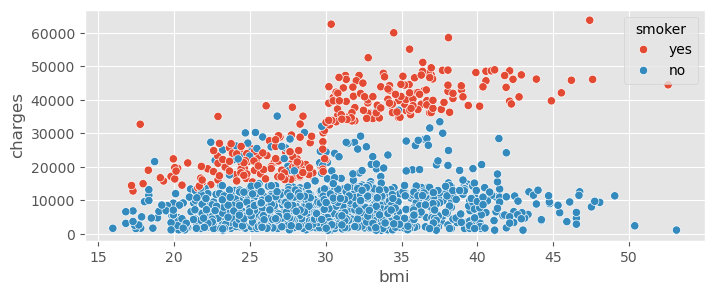

In [38]:
sns.scatterplot( data=insurance_data, x="bmi", y="charges", hue="smoker" )

The dependence of charges on BMI is much steeper if the client is a smoker!

## Exercise 4

You now analyse an **advertisement dataset** from the book *Introduction to Statistical Learning*.
The dataset contains, for several markets, the advertising budget (in \$1000) spent on

- TV,
- radio,
- newspaper,

and the corresponding **sales** (in thousands of units). The goal is to understand the effect
of different media and their interactions on sales using multiple Bayesian linear regression.

### a)

Load the advertisement dataset with Pandas and obtain an overview of the variables:

- `TV` (advertising budget for TV),
- `radio` (advertising budget for radio),
- `newspaper` (advertising budget for newspapers),
- `sales` (units sold, in thousands).

Perform an **exploratory analysis**:

- Create scatter plots of each predictor against `sales`,
- Comment on which predictors appear to have a clear relationship with `sales`,
- Note any signs of nonlinearity or heteroscedasticity.

In [39]:
adv_data = pd.read_csv("data/advertising.csv")
adv_data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


<Axes: xlabel='TV', ylabel='sales'>

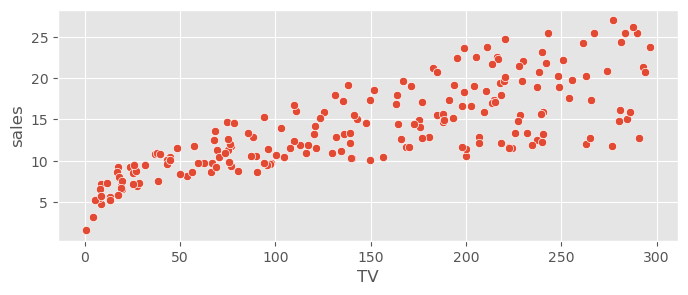

In [40]:
sns.scatterplot( data=adv_data, x="TV", y="sales" )

<Axes: xlabel='radio', ylabel='sales'>

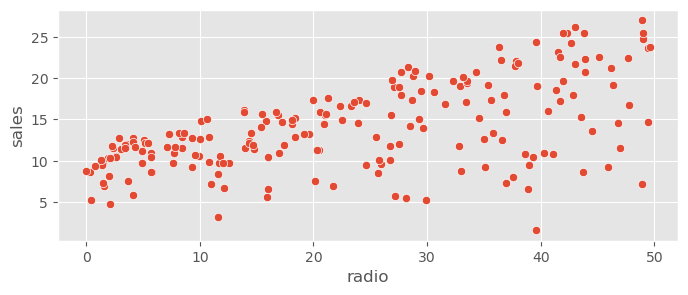

In [41]:
sns.scatterplot( data=adv_data, x="radio", y="sales" )

<Axes: xlabel='newspaper', ylabel='sales'>

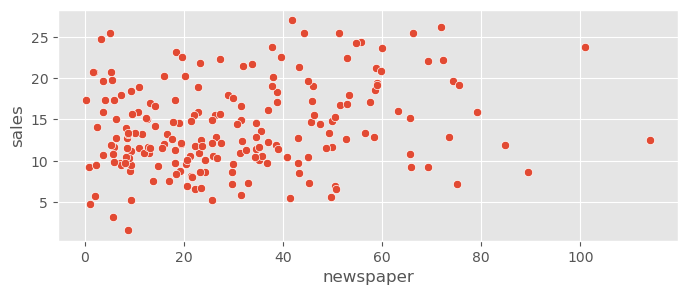

In [42]:
sns.scatterplot( data=adv_data, x="newspaper", y="sales" )

Expect contributions by radio and TV, probably not by newspaper.

### b)

Fit a multiple Bayesian linear regression model that predicts `sales` from **all** available
predictors:

$$
\mathbb{E}[\text{sales} \mid \text{TV},\text{radio},\text{newspaper}]
= \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio} + \beta_3 \text{newspaper}.
$$

Tasks:

1. Summarize the posterior distributions of all regression coefficients with $95\%$ HDIs.
2. Decide which predictors **contribute significantly** to the model (HDIs excluding zero).
3. Interpret the coefficients:
   - How much does `sales` increase when the TV budget increases by \$1000, holding
     other variables constant?
   - How do radio and newspaper budgets influence sales according to the model?

In [43]:
adv_model1 = bmb.Model("sales ~ TV + radio + newspaper", data=adv_data, family="gaussian")
adv_trace1 = adv_model1.fit(draws=2000, tune=2000)
pm.summary( adv_trace1, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, TV, radio, newspaper]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,1.696,0.087,1.537,1.875,0.001,0.001,11637.0,6564.0,1.0
Intercept,2.932,0.315,2.304,3.535,0.003,0.003,12480.0,6872.0,1.0
TV,0.046,0.001,0.043,0.048,0.000,0.000,9719.0,6600.0,1.0
radio,0.189,0.009,0.170,0.205,0.000,0.000,9011.0,6908.0,1.0
newspaper,-0.001,0.006,-0.013,0.011,0.000,0.000,8996.0,6755.0,1.0


The 95\% HDI for newspaper includes zero, thus newspaper does not contribute significantly at the 95% level. For each 1000 USD spent on TV ads, 46 more units are sold (43-49 in 95% HDI), for each 1000 USD spent on radio ads, 189 more units are sold (172-205 in 95% HDI).

### c)

Compute **Bayesian predictive RMSE** and **Bayesian $R^2$** for this model using posterior
predictive simulations.

Interpret the results:

- Is the model **good enough** for practical purposes?
- In particular, what does the RMSE tell you about the typical forecast error in units
  of thousands of sales?

In [44]:
adv_model1.predict(adv_trace1, kind="response")
ypred = az.extract( adv_trace1.posterior_predictive ).sales.values.T
ytrue = adv_data.sales.values

RMSE:

In [45]:
rmse = np.sqrt( np.mean( (ypred - ytrue)**2 ) )
rmse

np.float64(2.392592625451304)

In [46]:
rmse / np.mean(adv_data.sales)

np.float64(0.17062525408816573)

Our predictions will typically be away from the true value by $\pm$ 2400 sold units, this is about 20% of the units being typically sold. For the advertisement business I wouldn't expect much more..

$R^2$:

In [47]:
pm.r2_score( ytrue, ypred )

r2        0.826892
r2_std    0.015734
dtype: float64

### d)

Refit your model **without** the `newspaper` predictor:

$$
\mathbb{E}[\text{sales} \mid \text{TV},\text{radio}]
= \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio}.
$$

Tasks:

1. Recompute Bayesian RMSE and $R^2$.
2. Compare the predictive performance to the full model:
   - Do RMSE and $R^2$ change substantially?
   - Is `newspaper` an important predictor for sales, according to your analysis?

In [48]:
adv_model2 = bmb.Model("sales ~ TV + radio", data=adv_data, family="gaussian")
adv_trace2 = adv_model2.fit(draws=2000, tune=2000)
pm.summary( adv_trace2, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, TV, radio]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,1.691,0.085,1.527,1.860,0.001,0.001,11014.0,6841.0,1.0
Intercept,2.917,0.292,2.348,3.490,0.003,0.003,13175.0,5954.0,1.0
TV,0.046,0.001,0.043,0.049,0.000,0.000,11338.0,6458.0,1.0
radio,0.188,0.008,0.172,0.204,0.000,0.000,12633.0,6971.0,1.0


In [49]:
adv_model2.predict(adv_trace2, kind="response")
ypred = az.extract( adv_trace2.posterior_predictive ).sales.values.T
ytrue = adv_data.sales.values

RMSE:

In [50]:
np.sqrt( np.mean( (ypred - ytrue)**2 ) )

np.float64(2.386114969682464)

$R^2$:

In [51]:
pm.r2_score( ytrue, ypred )

r2        0.827571
r2_std    0.015798
dtype: float64

No significant changes in RMSE or $R^2$.

### e)

There may be **synergy or redundancy** between TV and radio advertising:

- **Synergy**: people exposed through both channels are more likely to buy, so the combined
  effect is larger than the sum of the individual effects.
- **Redundancy**: one channel is enough, and the other adds little additional effect.

Introduce an **interaction** between TV and radio in your model, for example

$$
\mathbb{E}[\text{sales} \mid \text{TV},\text{radio}]
= \beta_0 + \beta_1 \text{TV} + \beta_2 \text{radio}
  + \beta_3 (\text{TV} \times \text{radio}).
$$

Tasks:

1. Fit this interaction model and inspect the posterior of the interaction coefficient
   $\beta_3$.
2. Decide whether the interaction term is **significant** (HDI excluding zero).
3. Interpret whether the model suggests **synergy** ($\beta_3 > 0$), **redundancy**
   ($\beta_3 < 0$), or no clear interaction ($\beta_3 \approx 0$).
4. Compare predictive performance (RMSE and $R^2$) with the model from part (d).

In [52]:
adv_model3 = bmb.Model("sales ~ TV + radio + TV:radio", data=adv_data, family="gaussian")
adv_trace3 = adv_model3.fit(draws=2000, tune=2000)
pm.summary( adv_trace3, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, TV, radio, TV:radio]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 5 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.949,0.049,0.858,1.048,0.001,0.001,6564.0,4812.0,1.0
Intercept,6.750,0.251,6.269,7.233,0.004,0.003,3289.0,4348.0,1.0
TV,0.019,0.002,0.016,0.022,0.000,0.000,3256.0,4474.0,1.0
radio,0.029,0.009,0.012,0.047,0.000,0.000,3005.0,4204.0,1.0
TV:radio,0.001,0.000,0.001,0.001,0.000,0.000,2801.0,3793.0,1.0


The interaction term is significant and positive - meaning that if TV and radio are high, the amount of sales is even higher (synergy).

Predictive performance:

In [53]:
adv_model3.predict(adv_trace3, kind="response")
ypred = az.extract( adv_trace3.posterior_predictive ).sales.values.T
ytrue = adv_data.sales.values

RMSE:

In [54]:
rmse = np.sqrt( np.mean( (ypred - ytrue)**2 ) )
rmse

np.float64(1.3383383616612556)

In [55]:
rmse / adv_data.sales.mean()

np.float64(0.09544220799866326)

Our predictions will now typically be away from the true value by only $\pm$ 1300 sold units! this is about 10% of the units being typically sold! This is good..

$R^2$:

In [56]:
pm.r2_score( ytrue, ypred )

r2        0.938312
r2_std    0.006006
dtype: float64

A large part of the variance is now explained.

### f)

In your exploratory plots from part (a), you may have seen signs of **heteroscedasticity**:
the variance of `sales` appears to depend on the level of advertising budget.

To alleviate this, consider modelling the **logarithm of sales** instead of `sales` itself.

Tasks:

1. Use scatter plots to compare the relationship between predictors and
   $$
   \log(\text{sales})
   $$
   to the relationship with `sales`. Check whether the variance appears more stable.
2. Fit a multiple regression model (including the TV–radio interaction) for $\log(\text{sales})$.
3. Compute RMSE and $R^2$ (on the log scale) and compare to the model from part (d).

Discuss whether modelling log-sales seems more appropriate and whether it improves
predictive performance and homoscedasticity.

In [57]:
adv_data['logsales'] = np.log( adv_data.sales )
adv_data.head()

,TV,radio,newspaper,sales,logsales
0,230.1,37.8,69.2,22.1,3.095578
1,44.5,39.3,45.1,10.4,2.341806
2,17.2,45.9,69.3,9.3,2.230014
3,151.5,41.3,58.5,18.5,2.917771
4,180.8,10.8,58.4,12.9,2.557227


<Axes: xlabel='TV', ylabel='logsales'>

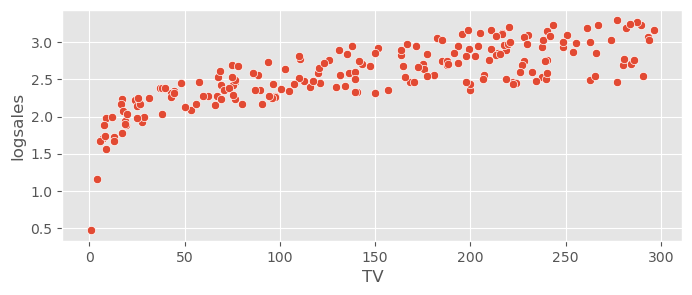

In [58]:
sns.scatterplot( data=adv_data, x="TV", y="logsales", )

<Axes: xlabel='radio', ylabel='logsales'>

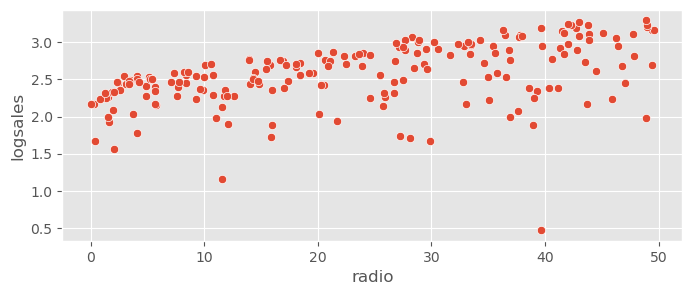

In [59]:
sns.scatterplot( data=adv_data, x="radio", y="logsales" )

<Axes: xlabel='newspaper', ylabel='logsales'>

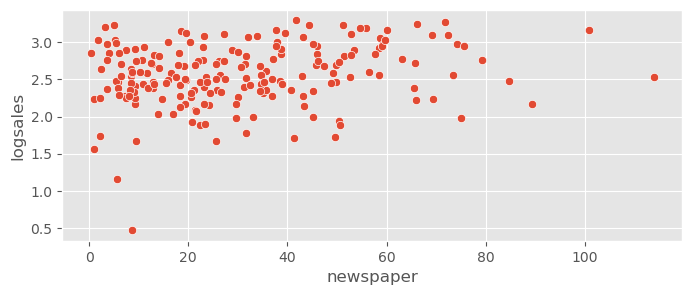

In [60]:
sns.scatterplot( data=adv_data, x="newspaper", y="logsales" )

The variance is now more constant along the predictors, however the residuals look a bit more skewed now. Let's check how this works!

In [61]:
adv_model4 = bmb.Model("logsales ~ TV + radio + TV:radio", data=adv_data, family="gaussian")
adv_trace4 = adv_model4.fit(draws=2000, tune=2000)
pm.summary( adv_trace4, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, TV, radio, TV:radio]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 4 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.177,0.009,0.160,0.195,0.000,0.000,6129.0,4903.0,1.0
Intercept,1.915,0.047,1.823,2.006,0.001,0.001,3102.0,3909.0,1.0
TV,0.002,0.000,0.002,0.003,0.000,0.000,2812.0,3928.0,1.0
radio,0.005,0.002,0.002,0.008,0.000,0.000,2927.0,3914.0,1.0
TV:radio,0.000,0.000,0.000,0.000,0.000,0.000,2629.0,3659.0,1.0


Predictive performance:

In [62]:
adv_model4.predict(adv_trace4, kind="response")
ypred = np.exp( az.extract( adv_trace4.posterior_predictive ).logsales.values.T )
ytrue = adv_data.sales.values

RMSE:

In [63]:
rmse = np.sqrt( np.mean( (ypred - ytrue)**2 ) )
rmse

np.float64(3.2639485089464157)

In [64]:
rmse / adv_data.sales.mean()

np.float64(0.23276509245472743)

$R^2$:

In [65]:
pm.r2_score( ytrue, ypred )

r2        0.796211
r2_std    0.017985
dtype: float64

The model performs much worse. Probably because we violated the assumption of normally distributed residuals.

## Exercise 5

You now return to the **body fat vs BMI** dataset in `bodyfat.csv`, this time **including**
the outliers that were previously removed. The goal is to compare standard and robust
Bayesian linear regression models and evaluate their predictive performance.

### a)

Load the dataset with Pandas and produce a scatter plot of `BMI` against `BodyFat` using
all available data points.

- Visually inspect the scatter plot and identify **outliers** that deviate strongly from
  the main trend.
- Reflect on how these outliers might influence the coefficients of a linear regression
  model with normal likelihood.

In [66]:
bodyfat_data = pd.read_csv("data/bodyfat.csv")
bodyfat_data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,70.0,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.6
1,1.0853,6.1,22,78.6,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.3
2,1.0414,25.3,22,69.9,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.7
3,1.0751,10.4,26,83.8,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.9
4,1.0340,28.7,24,83.6,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.5


<Axes: xlabel='BMI', ylabel='BodyFat'>

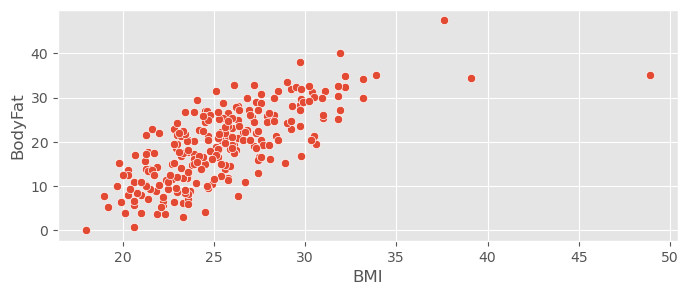

In [67]:
sns.scatterplot( bodyfat_data, x="BMI", y="BodyFat" )

### b)

Fit a **simple linear regression** model with normal likelihood using Bambi, e.g.

```python
bf_model_normal = bmb.Model("BodyFat ~ BMI", data=bodyfat_data, family="gaussian")
bf_trace_normal = bf_model_normal.fit()
```

Tasks:

1. Compute predictive RMSE and Bayesian $R^2$ for this normal-likelihood model.
2. Plot the regression model and uncertainty bands using
   `bmb.interpret.plot_predictions()`.
3. Comment on how well the model fits the main bulk of the data and how it is affected
   by the outliers.

In [68]:
bodyfat_model1 = bmb.Model("BodyFat ~ BMI", data=bodyfat_data, family="gaussian")
bodyfat_trace1 = bodyfat_model1.fit(draws=2000, tune=2000)
pm.summary( bodyfat_trace1, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, BMI]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,5.774,0.260,5.283,6.288,0.002,0.003,11866.0,6220.0,1.0
Intercept,-22.896,2.543,-27.579,-17.531,0.022,0.028,12819.0,6351.0,1.0
BMI,1.654,0.099,1.450,1.840,0.001,0.001,12308.0,6128.0,1.0


Plot:

Default computed for conditional variable: BMI


(<Figure size 800x300 with 1 Axes>,
 array([<Axes: xlabel='BMI', ylabel='BodyFat'>], dtype=object))

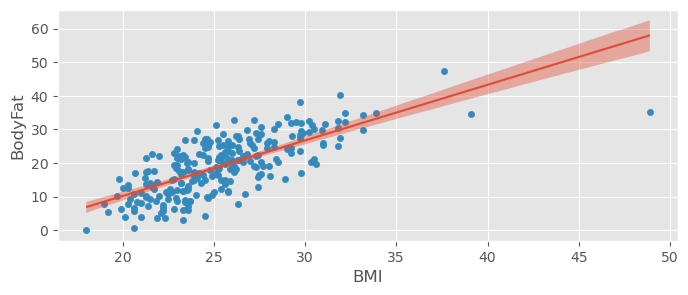

In [69]:
bodyfat_data.plot.scatter( x="BMI", y="BodyFat" )
bmb.interpret.plot_predictions( bodyfat_model1, bodyfat_trace1, "BMI", prob=0.95, ax=plt.gca() )

Predictive performance:

In [70]:
bodyfat_model1.predict(bodyfat_trace1, kind="response")
ypred = az.extract( bodyfat_trace1.posterior_predictive ).BodyFat.values.T
ytrue = bodyfat_data.BodyFat.values

RMSE:

In [71]:
np.sqrt( np.mean( (ypred - ytrue)**2 ) )

np.float64(8.151465963173502)

Our predictions will now typically be away from the true value by around $\pm$ 8%.

$R^2$:

In [72]:
pm.r2_score( ytrue, ypred )

r2        0.513199
r2_std    0.027314
dtype: float64

There are better $R^2$ values in the world..

### c)

Fit a **robust** linear regression model that replaces the normal likelihood with a
**Student's $t$ likelihood**. In Bambi, you can do this by specifying

```python
bf_model_t = bmb.Model("BodyFat ~ BMI", data=bodyfat_data, family="t")
bf_trace_t = bf_model_t.fit()
```

Tasks:

1. Compare the robust model to the non-robust model:
   - Compute RMSE and Bayesian $R^2$ for both.
   - Plot both regression fits in the same figure using
     `bmb.interpret.plot_predictions()`.
2. Discuss whether the models differ significantly and which one you would prefer
   in the presence of outliers.

In [73]:
bodyfat_model2 = bmb.Model("BodyFat ~ BMI", data=bodyfat_data, family="t")
bodyfat_trace2 = bodyfat_model2.fit(draws=2000, tune=2000)
pm.summary( bodyfat_trace2, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, nu, Intercept, BMI]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,5.525,0.283,4.977,6.084,0.003,0.003,6717.0,5956.0,1.0
nu,26.547,13.361,6.689,52.875,0.157,0.199,6800.0,5675.0,1.0
Intercept,-24.806,2.819,-30.321,-19.225,0.031,0.029,8377.0,6308.0,1.0
BMI,1.731,0.111,1.500,1.939,0.001,0.001,8248.0,6281.0,1.0


Plot:

Default computed for conditional variable: BMI
Default computed for conditional variable: BMI


(<Figure size 800x300 with 1 Axes>,
 array([<Axes: xlabel='BMI', ylabel='BodyFat'>], dtype=object))

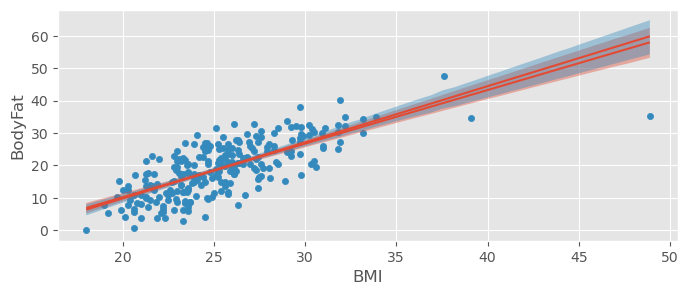

In [74]:
bodyfat_data.plot.scatter( x="BMI", y="BodyFat" )
bmb.interpret.plot_predictions( bodyfat_model1, bodyfat_trace1, "BMI", prob=0.95, ax=plt.gca() )
bmb.interpret.plot_predictions( bodyfat_model2, bodyfat_trace2, "BMI", prob=0.95, ax=plt.gca() )

Predictive performance:

In [75]:
bodyfat_model2.predict(bodyfat_trace2, kind="response")
ypred = az.extract( bodyfat_trace2.posterior_predictive ).BodyFat.values.T
ytrue = bodyfat_data.BodyFat.values

RMSE:

In [76]:
np.sqrt( np.mean( (ypred - ytrue)**2 ) )

np.float64(8.182406471636726)

Our predictions will now typically be away from the true value by around $\pm 8%$.

$R^2$:

In [77]:
pm.r2_score( ytrue, ypred )

r2        0.524749
r2_std    0.027579
dtype: float64

Only very slight improvement! Probably better prefer the simpler model.

### d)

As an additional **model selection** tool, compare the models using **expected log
predictive density (ELPD)**.

Tasks:

1. For each model, compute the log-likelihood for each observation, for each posterior
   draw, using
   ```python
   pm.compute_log_likelihood(model.backend.model)
   ```
   or an equivalent approach.
2. Use `pm.compare()` and `pm.plot_compare()` (from ArviZ / PyMC) to compute and
   visualize ELPD-based model comparison.

Questions:

- Which model is preferred according to ELPD and its uncertainty?
- In this case, do you trust more the comparison via RMSE/$R^2$ or via ELPD?
  Explain your reasoning.

Compute log likelihoods:

In [78]:
with bodyfat_model1.backend.model:
    pm.compute_log_likelihood( bodyfat_trace1 )

with bodyfat_model2.backend.model:
    pm.compute_log_likelihood( bodyfat_trace2 )

Output()

Output()

Compare ELPDs:

In [79]:
compare_dict = {
    'Normal model': bodyfat_trace1, 
    'Robust model': bodyfat_trace2 
}
comp = pm.compare( compare_dict )
comp

/home/chuwyler/miniconda3/envs/bayesian-machine-learning/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/chuwyler/miniconda3/envs/bayesian-machine-learning/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
Robust model,0,-5955.883625,2078.364114,0.000000,1.000000e+00,69.720592,0.000000,True,log
Normal model,1,-9954.396132,4018.768428,3998.512507,1.110223e-14,159.986916,90.431108,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

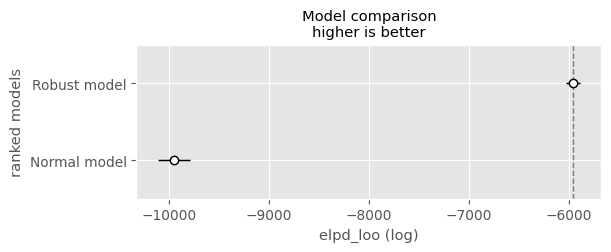

In [80]:
pm.plot_compare( comp )

There seems to a big difference in terms of predictive performance. However both loo estimates produced warnings and our predictive performance estimates say otherwise. Personally, I would trust more in RMSE and $R^2$ here.

### e)

Just for exploration, fit a **robust multiple linear regression** model for `BodyFat` using
all available predictors in `bodyfat.csv` (except `Density`, which is used to compute
`BodyFat`). Use a Student's $t$ likelihood as in part (c).

Tasks:

1. Evaluate whether this richer model improves RMSE and $R^2$ compared to the simpler
   models in parts (b) and (c).
2. Inspect the posterior distribution of the degrees-of-freedom parameter $\nu$ of the
   Student's $t$ likelihood:
   - Does $\nu$ suggest heavy tails (small values) or tails close to normal (large values)?
3. Based on the posterior of $\nu$ and the predictive performance, would you rather use
   a normal or a Student's $t$ likelihood for this dataset?

In [81]:
bodyfat_data.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,BMI
0,1.0708,12.3,23,70.0,172.1,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.6
1,1.0853,6.1,22,78.6,183.5,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.3
2,1.0414,25.3,22,69.9,168.3,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.7
3,1.0751,10.4,26,83.8,183.5,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.9
4,1.0340,28.7,24,83.6,181.0,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.5


In [82]:
bodyfat_model3 = bmb.Model(
    "BodyFat ~ Age + Weight + Height + Neck + Chest + Abdomen + Hip + Thigh + Knee + Ankle + Biceps + Forearm + Wrist + BMI", 
    data=bodyfat_data, 
    family="t"
)
bodyfat_trace3 = bodyfat_model3.fit(draws=2000, tune=2000)
pm.summary( bodyfat_trace3, hdi_prob=0.95 )

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, nu, Intercept, Age, Weight, Height, Neck, Chest, Abdomen, Hip, Thigh, Knee, Ankle, Biceps, Forearm, Wrist, BMI]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 24 seconds.


,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,4.152,0.206,3.776,4.574,0.002,0.002,9917.0,5681.0,1.0
nu,32.525,15.211,9.499,62.965,0.148,0.226,11537.0,6283.0,1.0
Intercept,-142.532,52.377,-242.526,-35.642,0.792,0.593,4396.0,4762.0,1.0
Age,0.073,0.032,0.009,0.136,0.000,0.000,7903.0,6524.0,1.0
Weight,-0.943,0.319,-1.565,-0.304,0.005,0.004,4454.0,4882.0,1.0
Height,0.735,0.295,0.172,1.340,0.005,0.003,4028.0,4406.0,1.0
Neck,-0.473,0.233,-0.926,-0.019,0.002,0.003,10601.0,6117.0,1.0
Chest,-0.077,0.108,-0.291,0.130,0.001,0.001,8845.0,5557.0,1.0
Abdomen,0.899,0.091,0.720,1.072,0.001,0.001,8927.0,6249.0,1.0
Hip,-0.300,0.148,-0.584,-0.003,0.002,0.002,9723.0,6180.0,1.0


The uncertainty on $\nu$ is still quite large! Since it is large (mean of 33), probably a normal likelihood could be preferred.
The following variables do not seem to be significant at to 95% level: Neck, Chest, Thigh, Knee, Ankle, Biceps, Forearm. It might make sense to refit a model without them.

Predictions:

In [83]:
bodyfat_model3.predict(bodyfat_trace3, kind="response")
ypred = az.extract( bodyfat_trace3.posterior_predictive ).BodyFat.values.T
ytrue = bodyfat_data.BodyFat.values

RMSE:

In [84]:
np.sqrt( np.mean( (ypred - ytrue)**2 ) )

np.float64(6.068379228018641)

Our predictions will now typically be away from the true value by around $\pm 6%$, this is 25% better!

$R^2$:

In [85]:
pm.r2_score( ytrue, ypred )

r2        0.662684
r2_std    0.023387
dtype: float64

Quite a bit more variance explained!

## Exercise 6

You work for the **European Space Agency** in the maintenance team for a satellite. Among
other telemetry, you receive daily measurements of the **fuel level** of its thrusters. Three
days ago you discovered that the fuel level has started to decrease **faster than usual**, and
you suspect a **leak**.

The goal is to estimate the **remaining mission time** before the fuel runs out, using Bayesian
linear regression on fuel level data from `fuel_data.csv`.

### a)

Load the dataset from `fuel_data.csv`. It contains:

- `t`: time in days (starting from $t = 0$),
- `tank_level`: fuel tank level in mg,
- `state`: suspected state of the fuel tank (nominal / leaking).

Tasks:

1. Plot `tank_level` against time `t`.
2. Verify that the time point where the tank level begins to decrease more quickly is
   visible (around $t = 19$ days).
3. Mark the approximate change point between nominal operation and leaking behaviour.

Load data:

In [86]:
fuel_data = pd.read_csv("data/fuel_data.csv")
fuel_data

,t,tank_level,state
0,0,48.270,nominal
1,1,48.301,nominal
2,2,48.218,nominal
3,3,48.275,nominal
4,4,48.207,nominal
5,5,48.122,nominal
6,6,48.073,nominal
7,7,48.119,nominal
8,8,47.931,nominal
9,9,47.843,nominal


Plot:

<Axes: xlabel='t', ylabel='tank_level'>

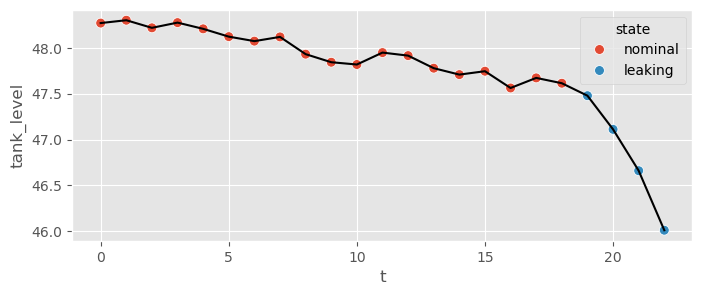

In [87]:
sns.lineplot( data=fuel_data, x="t", y="tank_level", c="black" )
sns.scatterplot( data=fuel_data, x="t", y="tank_level", hue="state", s=50 )

### b)

First, fit a model to the **nominal** data points to estimate the **regular fuel consumption
rate** $r$ (mg per day) when the tank is intact.

Restrict the data to $t \in [0,19]$ and fit a **linear regression model** with a **negative slope**
for fuel consumption.

Instead of Bambi's default priors, use **informative engineering priors**:

- Bambi normally uses an intercept at the *center* of the data. Here, the center in time
  is between 9 and 10 days. Define a custom intercept
  $$
  y_0 = \tfrac{1}{2}\big(\text{tank\_level}[9] + \text{tank\_level}[10]\big),
  $$
  and assume an engineering prior uncertainty of $\sigma = 0.2\,\text{mg}$ on this level.
- The engineering team reports a typical consumption rate of about $40\,\mu\text{g}$ per day,
  roughly between $20\,\mu\text{g}$ and $60\,\mu\text{g}$. Use PreliZ to devise a normal
  prior for the **slope** (fuel rate $r$):
  - Centered around $-40\,\mu\text{g}$ (negative, since fuel decreases),
  - With a standard deviation that assigns appreciable prior mass between $-60$ and
    $-20\,\mu\text{g}$.

Pass these priors to Bambi, fit the model to the first 20 data points ($t \le 19$), and use
`bmb.interpret.plot_predictions(..., pps=True)` to visualize model predictions.

Estimate a $95\%$ HDI for the regular fuel consumption rate $r$.

Prior for intercept:

<Axes: >

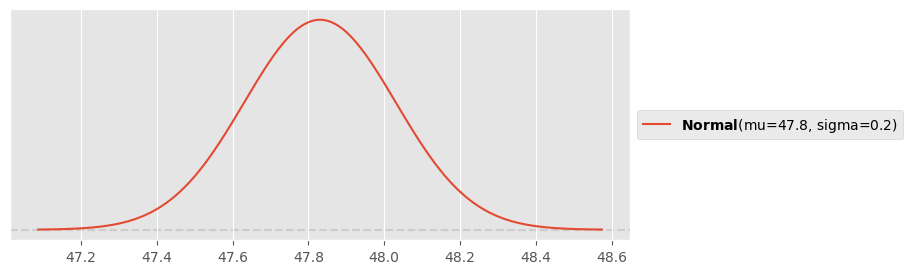

In [88]:
y0 = (fuel_data.tank_level[9]+fuel_data.tank_level[10])/2
pz.Normal(y0, 0.2).plot_pdf()

Prior for regular fuel decrease:

<Axes: >

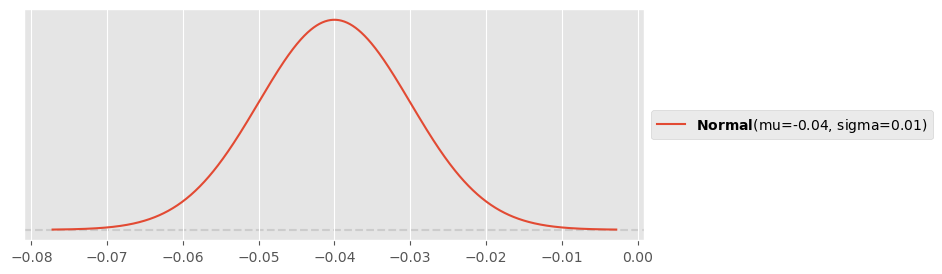

In [89]:
pz.Normal(-0.04, 0.01).plot_pdf()

Fit model:

In [90]:
priors = {
    "Intercept": bmb.Prior("Normal", mu=y0, sigma=0.2),
    "t": bmb.Prior("Normal", mu=-0.04, sigma=0.01), 
}
normal_tank_model = bmb.Model("tank_level ~ t", data=fuel_data[fuel_data.t <= 19], priors=priors, family="gaussian")
normal_tank_trace = normal_tank_model.fit(draws=2000, tune=2000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, t]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.


Default computed for conditional variable: t


(<Figure size 800x300 with 1 Axes>,
 array([<Axes: xlabel='t', ylabel='tank_level'>], dtype=object))

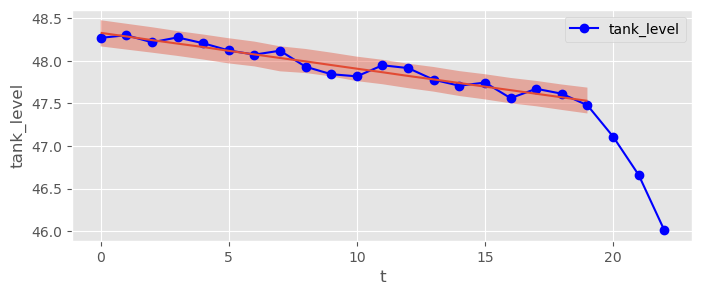

In [91]:
fuel_data.plot( x="t", y="tank_level", marker="o", c="blue" )
bmb.interpret.plot_predictions( normal_tank_model, normal_tank_trace, "t", prob=0.95, pps=True, ax=plt.gca() )

In [92]:
pm.summary( normal_tank_trace, hdi_prob=0.95 )

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.070,0.013,0.048,0.095,0.0,0.0,7908.0,5275.0,1.0
Intercept,48.328,0.030,48.269,48.388,0.0,0.0,9028.0,5409.0,1.0
t,-0.042,0.003,-0.047,-0.037,0.0,0.0,8895.0,5729.0,1.0


Typical fuel consumption between 37 and 47 $\mu g$ per day (95% HDI, results may vary slightly for different simulations).

### c)

Next, fit a separate model to the data points where a **leak** is suspected ($t \ge 19$). This
time, let Bambi choose default weakly-informative priors for you.

Tasks:

1. Fit a linear regression model for `tank_level` as a function of `t` on the leaking segment.
2. Visualize model predictions with `bmb.interpret.plot_predictions(..., pps=True)`.
3. Estimate a $95\%$ HDI for the **leaking fuel consumption rate** $r^\ast$ (the new,
   faster rate of decrease).

Compare the leaking rate $r^\ast$ with the nominal rate $r$ from part (b).

In [93]:
fuel_data[fuel_data.t>=19]

,t,tank_level,state
19,19,47.478,leaking
20,20,47.111,leaking
21,21,46.660,leaking
22,22,46.011,leaking


In [94]:
leaking_tank_model = bmb.Model("tank_level ~ t", data=fuel_data[fuel_data.t>=19], family="gaussian")
leaking_tank_trace = leaking_tank_model.fit(draws=2000, tune=2000)

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, Intercept, t]


Output()

Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 3 seconds.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


Default computed for conditional variable: t


(<Figure size 800x300 with 1 Axes>,
 array([<Axes: xlabel='t', ylabel='tank_level'>], dtype=object))

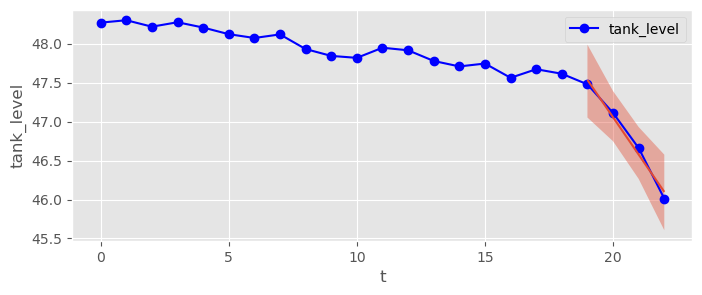

In [95]:
fuel_data.plot( x="t", y="tank_level", marker="o", c="blue" )
bmb.interpret.plot_predictions( leaking_tank_model, leaking_tank_trace, "t", prob=0.95, ax=plt.gca() )

In [96]:
pm.summary( leaking_tank_trace )

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
sigma,0.225,0.189,0.044,0.545,0.005,0.010,1124.0,1580.0,1.0
Intercept,56.633,2.736,52.216,61.711,0.060,0.293,3752.0,2413.0,1.0
t,-0.479,0.133,-0.708,-0.246,0.003,0.014,3764.0,2415.0,1.0


fuel loss between 228 and 697 $\mu$g per day! (results may vary from simulation to simulation, will get better with more data)

### d)

Mission control wants to know how long the satellite can be expected to continue operating,
i.e. **how many more days** the mission can last before the fuel tank is empty.

Using your estimate of the leaking consumption rate $r^\ast$ and the current fuel level at
the onset of the leak, compute the **posterior distribution** for the remaining mission time.

Tasks:

1. Use the $95\%$ HDI for $r^\ast$ and the current tank level to derive an estimate for
   the remaining number of days until the fuel reaches zero.
2. Propagate the uncertainty in $r^\ast$ into the predicted time-to-empty, and report a
   $95\%$ HDI for the mission end time.
3. Comment on how reliable this estimate is and what additional information or data
   could reduce the uncertainty.

In [97]:
t0 = fuel_data.tank_level[22] / np.abs( pm.hdi( leaking_tank_trace.posterior.t, 0.95 ) )
t0

<xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    t        (hdi) float64 16B 62.41 190.8

Between 63 and 232 days with a belief of 95%, however this is probably quite uncertain (especially if you re-run the simulation). You'll know more with more data!

Let us plot the distribution to better understand our uncertainty:

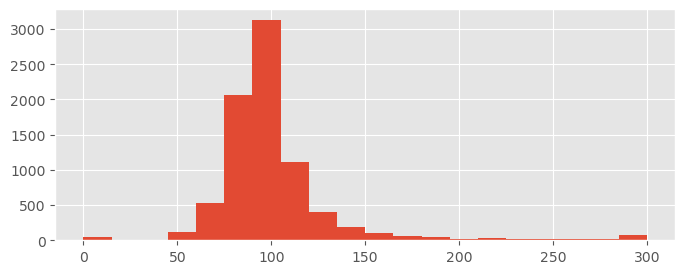

In [100]:
t0_values = -fuel_data.tank_level[22] / leaking_tank_trace.posterior.t.values.flatten()
plt.hist( t0_values.clip(0, 300), bins=20 );

(a few strong outliers - interesting exercise: find a good prior for $t$ to make them disappear)